In [49]:
import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf


import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }

In [185]:
import importlib 
# importlib.reload(PandemiXModelFunctions)
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\OneDrive - Roskilde Universitet\\Documents\\PandemiX\\GithubRepos\\PandemiX\\modelling\\PandemiXModelFunctions.py'>

In [186]:
sch = pmf.Scheme('SIR', {'S':0.99,'I':0.01}, {'beta':2/7,'gamma':1/7},0,50)

# cha = pmf.Change(5,MultiplyVariables={'I':0.9})
cha = pmf.Change(5,MultiplyParameters={'beta':0.9})
# cha = pmf.Change(5,MultiplyVariables={'I':0.9,'S':1})
sch.addChange(cha)

In [188]:
# print(sch)
# sch.getCallableFunction()
# sch.getCallableFunction(['Changes',0,'MultiplyVariables'])
# asdf = sch.getCallableFunction([0,'MultiplyVariables','I'])
# asdf = sch.getCallableFunction([0,'MultiplyParameters','beta'])
# sch.Changes[0]
asdf = sch.getCallableFunction('beta')
asdf(0.3) 

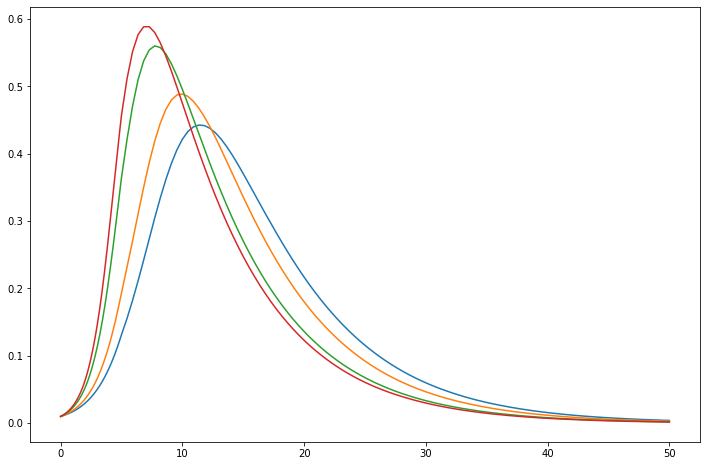

In [189]:
plt.figure() 
res = asdf(0.7)
plt.plot(res.t,res.I)
res = asdf(0.8)
plt.plot(res.t,res.I)
res = asdf(1.0)
plt.plot(res.t,res.I)
res = asdf(1.1)
plt.plot(res.t,res.I)

In [91]:
toOptimizeAttr = [0,'MultiplyVariables','I']
changeToOptimize = getattr(sch,'Changes')[toOptimizeAttr[0]]
dictToOptimize = getattr(changeToOptimize,toOptimizeAttr[1])
dictToOptimize[toOptimizeAttr[2]] = 1.1 

# print(sch.Changes[0])

At time 5, multiply variables I: 1.1


(<Figure size 864x576 with 2 Axes>,
 array([<AxesSubplot:ylabel='S'>, <AxesSubplot:ylabel='I'>], dtype=object))

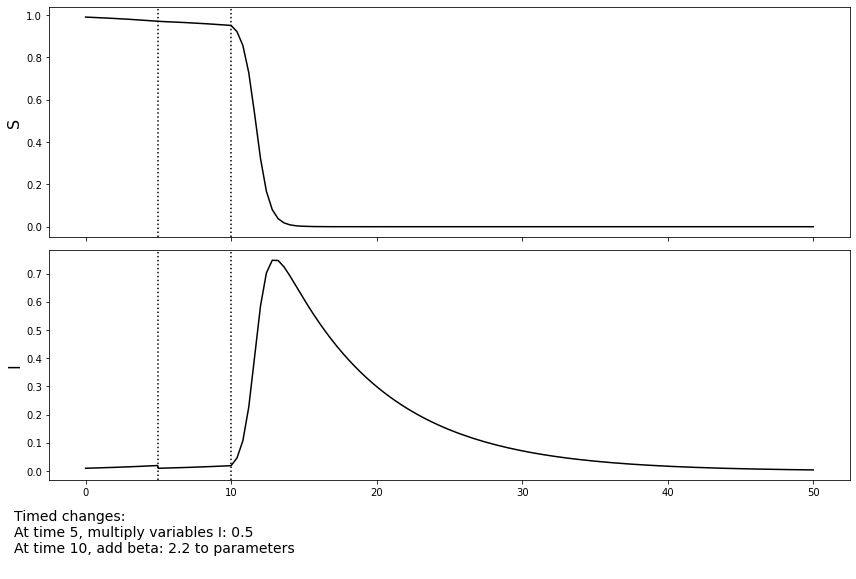

In [3]:
sch = pmf.Scheme('SIR', {'S':0.99,'I':0.01}, {'beta':2/7,'gamma':1/7},0,50,Changes=[])
toAdd = {'I':0.50}
# print(len(toAdd))
cha = pmf.Change(5,MultiplyVariables=toAdd)
sch.addChange(cha)
sch.simulate()
# toAdd = {'I':0.1}
# cha2 = pmf.Change(10,MultiplyVariables=toAdd)
cha2 = pmf.Change(10,AddParameters={'beta':2.2})
sch.addChange(cha2)
sch.simulate()
sch.plot()

In [47]:
# len(dictMeta)
np.ones(len(dictMeta))

array([1., 1.])

In [ ]:

curDict = toAdd 
dictMeta = ['S','I']

curArray = []

for i in range(len(dictMeta)):
    curStr = dictMeta[i]
    if curStr in curDict:
        print(curStr)
        curArray.append(curDict[curStr])
    else:
        curArray.append(0) 
curArray

In [261]:
# pars = {'beta': 0.5,'gamma': 1/7}
# pars_meta = ['beta','gamma']
# type(pars)

# pars_array =[]
# pars[pars_meta[0]]

# if (type(pars) == dict):
#     pars_array =[]
#     for i in range(len(pars)):
#         pars_array.append(pars[pars_meta[i]]) 

# ax =[]
# fig,ax = plt.subplots()
# ax = []
# type(ax)

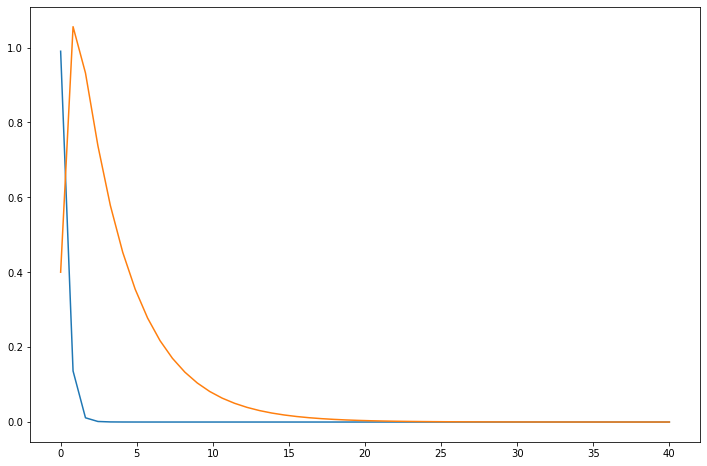

In [262]:
# pars = {'beta': 0.5,'gamma': 1/7}
# pars.items()
InitialConditions={'S':0.99,'I':0.01}
# InitialConditions.values()
ts = np.linspace(0,40)
asdf = pmf.simulateModel(TimeRange=ts,InitialConditions={'S':0.99,'I':0.4},Parameters={'beta':3,'gamma':0.3})

plt.figure()
plt.plot(ts,asdf[0,:])
plt.plot(ts,asdf[1,:])

In [263]:
# dfCase = pf.getLatest()
# plt.figure()
# plt.plot(dfCase.Date,dfCase.Total)

In [264]:
pmf.getModel('SIR')

(<function PandemiXModelFunctions.SIRmodel(t, x, beta, gamma)>,
 (['S', 'I'], ['beta', 'gamma']))

In [265]:
# init = {'S0': 0.99,'I0': 0.01}
# pars = {'beta': 2/7, 'gamma': 1/7}
init = [0.99,0.01]
pars = [2/7,1/7]
curScheme = pmf.Scheme('SIR',init,pars,0,30)
len(curScheme.Changes)  

0

In [266]:
curScheme.simulate()

(<Figure size 864x576 with 2 Axes>,
 [<AxesSubplot:ylabel='S'>, <AxesSubplot:ylabel='I'>])

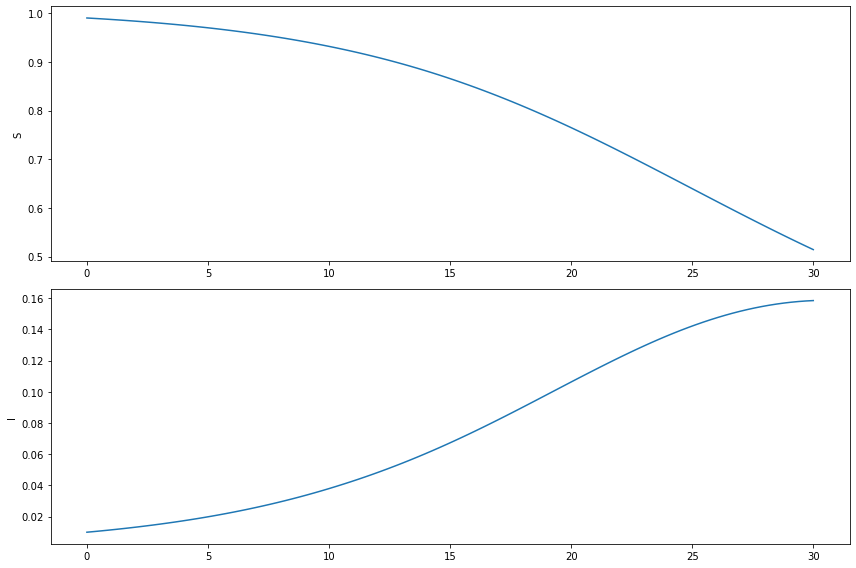

In [267]:
fig = plt.figure() 
curScheme.plot(fig)

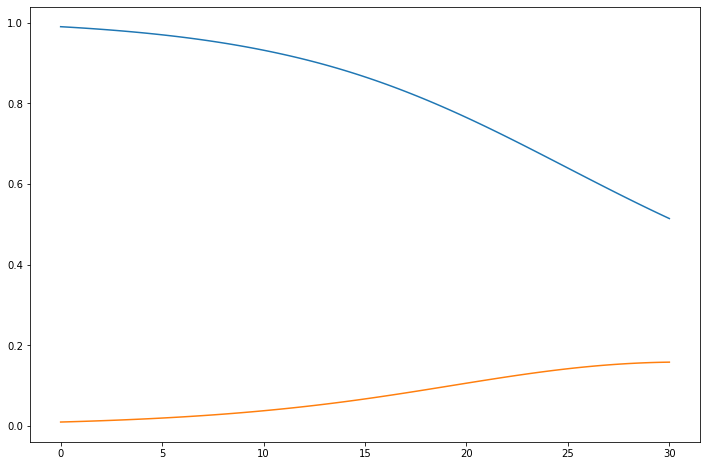

In [268]:
curScheme.result
curScheme.result.t
res = curScheme.result

plt.figure()
plt.plot(res.t,res.y[0,:])
plt.plot(res.t,res.y[1,:])

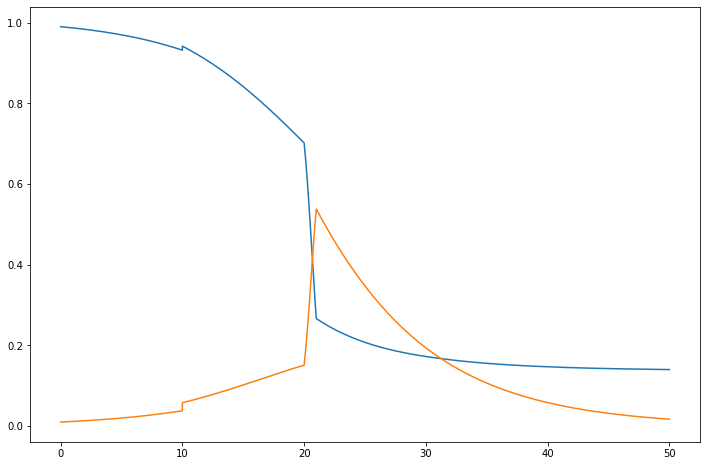

In [273]:
# toAdd = {'S0':3}
toAdd = [0.02,-0.02]
toAdd = [0,0]
toAdd = {'S':0.01,'I':0.02}
testChange = pmf.Change(10,AddVariables = toAdd)
# testChange2 = pmf.Change(30,AddVariables = toAdd)
# testChange = pmf.Change(10,AddVariables = toAdd)
# testChange2 = pmf.Change(20,MultiplyParameters = [10,1])
# testChange3 = pmf.Change(21,MultiplyParameters = [0.05,1])
testChange2 = pmf.Change(20,MultiplyParameters = {'beta':10,'gamma':1})
testChange3 = pmf.Change(21,MultiplyParameters = {'beta':0.05,'gamma':1})
curScheme = []
curScheme = pmf.Scheme('SIR',init,pars,0,50) 
curScheme.Changes = []
curScheme.addChange(testChange)
curScheme.addChange(testChange2)
curScheme.addChange(testChange3) 
curScheme.sortChanges()
curScheme.simulate()

plt.figure()
# plt.plot(curScheme.result.t)
plt.plot(curScheme.result.t,curScheme.result.y[0,:])
plt.plot(curScheme.result.t,curScheme.result.y[1,:])

(<Figure size 864x576 with 2 Axes>,
 array([<AxesSubplot:ylabel='S'>, <AxesSubplot:ylabel='I'>], dtype=object))

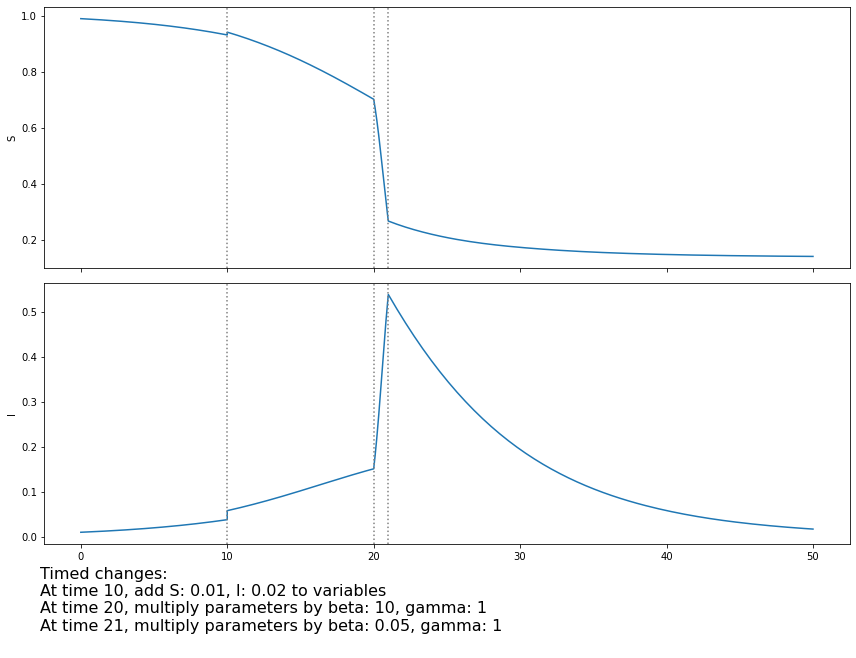

In [274]:
curScheme.plot()
# curScheme.Changes
# curDict = toAdd
# curDict.keys()

In [271]:
# testT = curScheme.result.t
# testV = curScheme.result.v
# # np.append(testT,testT)
# np.shape(np.concatenate([testV,testV],axis=1))
# # np.shape(np.concatenate([testT,testT],axis=0))


# # finalState = curScheme.result.v[:,-1]
# # asdf =finalState + toAdd



In [272]:
# ## Simulation schemes
# class Change:
#     def __init__(self,tChange,AddVariables = {},MultiplyVariables = {}):
#         self.t = tChange 
#         self.AddVariables = AddVariables
#         self.MultiplyVariables = MultiplyVariables
#         # TODO: Parameter changes
        
    
# class Scheme:
#     def __init__(self,ModelName,InitialConditions,Parameters,tStart,tEnd):
#         self.ModelName = ModelName
#         self.InitialConditions = InitialConditions
#         self.Parameters = Parameters
#         self.tStart = tStart
#         self.tEnd = tEnd
        
#         # Get reference to model
#         self.Model = getModel(ModelName)
        
#         # Initialize changes
#         self.Changes = []
        
#     def AddChange(ChangeToAdd):
#         self.Changes.append(ChangeTo)       
        